In [1]:
import os

import numpy as np
import scipy.optimize
from scipy.io import loadmat
# from astropy.modeling import models, fitting
import matplotlib.pyplot as plt


In [8]:
files = [file for file in os.listdir('./mats/') if file.endswith('mat')]

In [ ]:
clip_range = np.array([100, 700]) * 4  # 裁剪范围

for file in files:
    file_path = os.path.join('mats', file)
    data = loadmat(file_path)['val1']
    clear_data = np.zeros((2974, 1))
    clear_data[:1396] = data[:1396]
    clear_data[1397:] = data[1398:]  # 移位对其
    clip_data = clear_data[clip_range[0]:clip_range[1]]  # 裁剪
    for i in range(4):
        plt.plot(clip_data[i::4], c=f'C{i}', label=f'{i}')
    plt.title(file)
    plt.legend(loc='best')
    plt.savefig(file + '.png')
    plt.show()

In [ ]:
del_cols = []
for i in range(1, 5):
    count_0 = (data[:, i] == 0).sum()
    if count_0 > l / 4:
        print(i, count_0)
        del_cols.append(i)

clear_data = np.delete(data, del_cols, axis=1)
clear_data

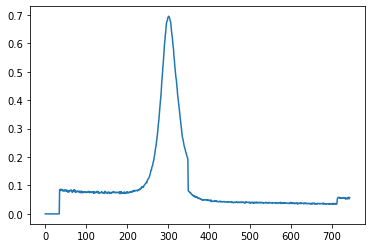

In [42]:
for i in range(1, clear_data.shape[1]):
    plt.plot(data_x, clear_data[:, i], label=f'{i}')
plt.show()

In [59]:
data_y = np.zeros((2976, 1))
data_y[:-1] = loadmat('./mats/268.mat')['val1']
data_y = data_y.reshape((-1, 4))
l = len(data_y)
data_x = np.arange(0, l)
# data = np.hstack((data_x[:, None], data_y))
data_col = data_y[:, 3]
data_col

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

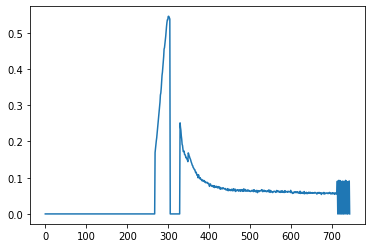

In [60]:
plt.plot(data_x, data_col)
plt.show()

(439,)


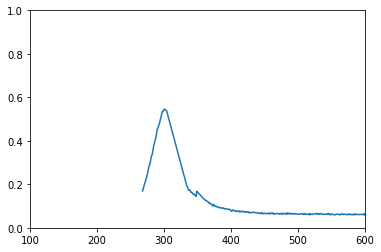

(35,)


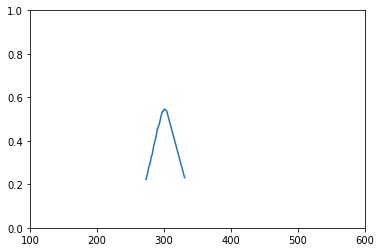

In [65]:
data_col_fit_idx = data_col != 0.
data_col_fit = data_col[data_col_fit_idx]
x_fit = data_x[data_col_fit_idx]
print(x_fit.shape)
plt.plot(x_fit, data_col_fit)
plt.xlim([100, 600])
plt.ylim([0, 1])
plt.show()
data_col_fit_idx = data_col_fit > min(data_col_fit) + (max(data_col_fit) - min(data_col_fit)) / 3
data_col_fit = data_col_fit[data_col_fit_idx]
x_fit = x_fit[data_col_fit_idx]
print(x_fit.shape)
plt.plot(x_fit, data_col_fit)
plt.xlim([100, 600])
plt.ylim([0, 1])
plt.show()

In [5]:
def gauss(x, A, mu, sigma, y0):
    return A * np.exp(-(x - mu) ** 2 / (2. * sigma ** 2)) + y0

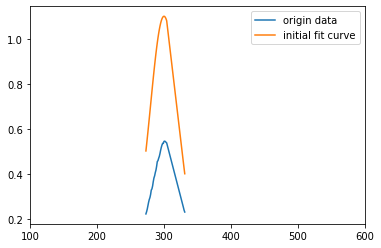

In [71]:
p0 = np.array([1., 300., 20, 0.1])
plt.plot(x_fit, data_col_fit, c='C0', label='origin data')
plt.plot(x_fit, gauss(x_fit, *p0), c='C1', label='initial fit curve')
plt.xlim([100, 600])
# plt.ylim([0, 1])
plt.legend()
plt.show()

In [70]:
popt, pcov = scipy.optimize.curve_fit(f=gauss, xdata=x_fit, ydata=data_col_fit, p0=p0)
print(popt)
print(pcov)

[4.13169153e-01 3.02262602e+02 1.71444280e+01 1.29457300e-01]
[[ 1.27219570e-04  1.08468261e-03  5.16234996e-03 -1.28037844e-04]
 [ 1.08468261e-03  1.87317248e-02  4.66509159e-02 -1.04168118e-03]
 [ 5.16234996e-03  4.66509159e-02  2.20714371e-01 -5.29192460e-03]
 [-1.28037844e-04 -1.04168118e-03 -5.29192460e-03  1.30768593e-04]]


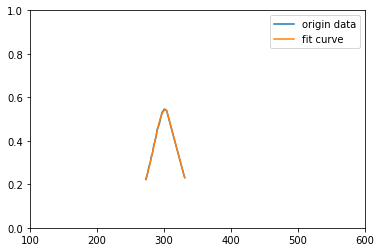

In [72]:
plt.plot(x_fit, data_col_fit, c='C0', label='origin data')
plt.plot(x_fit, gauss(x_fit, *popt), c='C1', label='fit curve')
plt.xlim([100, 600])
plt.ylim([0, 1])
plt.legend()
plt.show()